In [1]:
!pip install -r ../requirements.txt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("../results/outputs/cleaned_dataset.xlsx")

print("Dataset loaded successfully:", df.shape)
df.head()

Dataset loaded successfully: (1033036, 8)


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# Count missing values per column
df.isnull().sum()

# Specifically check CustomerID
missing_custid = df['customer_id'].isnull().sum()
print(f"Missing Customer IDs: {missing_custid}")

Missing Customer IDs: 235151


In [4]:
# has_id = 1 if CustomerID present, 0 if missing
df['has_id'] = df['customer_id'].notnull().astype(int)

df[['customer_id', 'has_id']].head(10)

,customer_id,has_id
0,13085.0,1
1,13085.0,1
2,13085.0,1
3,13085.0,1
4,13085.0,1
5,13085.0,1
6,13085.0,1
7,13085.0,1
8,13085.0,1
9,13085.0,1


In [5]:
# has_id = 1 if CustomerID present, 0 if missing
df['has_id'] = df['customer_id'].notnull().astype(int)

df[['customer_id', 'has_id']].head(10)

,customer_id,has_id
0,13085.0,1
1,13085.0,1
2,13085.0,1
3,13085.0,1
4,13085.0,1
5,13085.0,1
6,13085.0,1
7,13085.0,1
8,13085.0,1
9,13085.0,1


In [6]:
# Dataset with all rows (for general EDA)
df_all = df.copy()

# Dataset for RFM (drop rows without CustomerID)
df_rfm = df[df['customer_id'].notnull()].copy()

print("Original shape:", df.shape)
print("After dropping missing CustomerID:", df_rfm.shape)
df_rfm.to_csv("../results/outputs/IT24100344_missing.csv")

Original shape: (1033036, 9)
After dropping missing CustomerID: (797885, 9)


In [7]:
# Add a Revenue column
df['Revenue'] = df['quantity'] * df['price']

# Group by has_id flag to calculate revenue share
revenue_share = df.groupby('has_id')['Revenue'].sum()

print(revenue_share)


has_id
0    2.565542e+06
1    1.628999e+07
Name: Revenue, dtype: float64


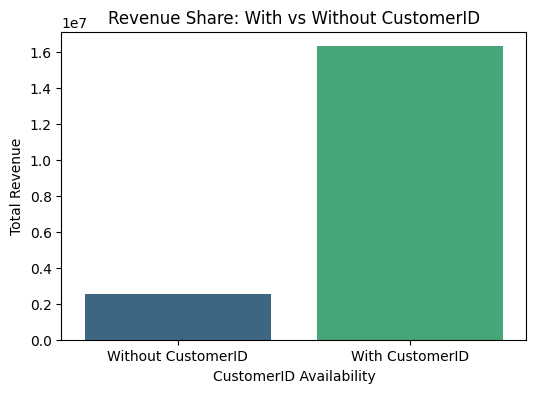

In [8]:
# Set style
plt.figure(figsize=(6,4))
sns.barplot(
    x=revenue_share.index,
    y=revenue_share.values,
    hue=revenue_share.index,   # <- fix warning
    palette="viridis",
    legend=False               # <- remove unnecessary legend
)

plt.xticks([0,1], ["Without CustomerID", "With CustomerID"])
plt.title("Revenue Share: With vs Without CustomerID")
plt.ylabel("Total Revenue")
plt.xlabel("CustomerID Availability")
plt.savefig("../results/eda_visualization/IT24100344_revenueshares")
plt.show()


In [44]:
import os
os.getcwd()


'D:\\SLIIT\\Year2_Sem1\\IT2011 Artificial Intelligence and Machine Learning\\online+retail+ii - Copy\\notebooks'